In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:

d = {
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

# using map function to mapping classes availble in Species column to the integer specified in dictionary
df['Species'] = df['Species'].map(d)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [6]:
df = df.drop(['Id'],axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df_species = df['Species']
df_species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [8]:
df = df.drop(['Species'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


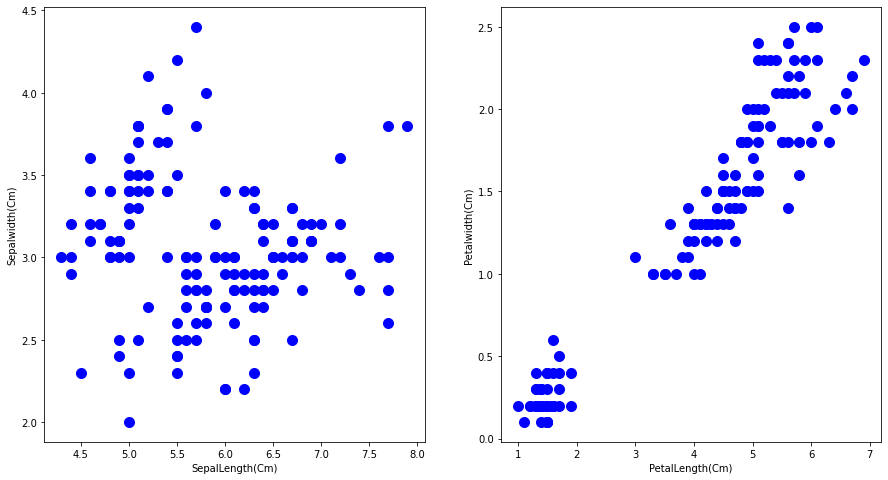

In [9]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],s=100,c='blue')
plt.xlabel('SepalLength(Cm)')
plt.ylabel('Sepalwidth(Cm)')


plt.subplot(1,2,2)
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],s=100,c='blue')
plt.xlabel('PetalLength(Cm)')
plt.ylabel('Petalwidth(Cm)')
plt.show()

In [10]:
X = df.iloc[:,2:]
X.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


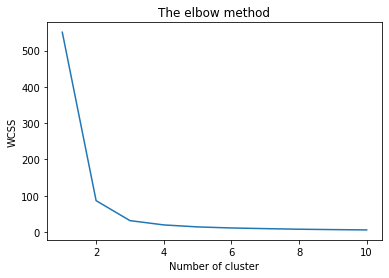

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=6)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

### K Means for petal length and petal width

In [12]:
# Model Training
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=6)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


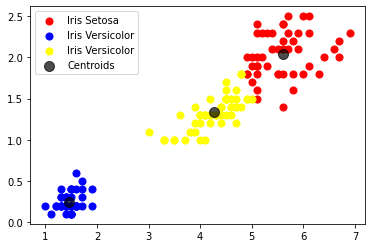

In [13]:
plt.scatter(X[y_kmeans == 0]['PetalLengthCm'], X[y_kmeans == 0]['PetalWidthCm'], s = 50, c = 'red', label = 'Iris Setosa')
plt.scatter(X[y_kmeans == 1]['PetalLengthCm'], X[y_kmeans == 1]['PetalWidthCm'], s = 50, c = 'blue', label = 'Iris Versicolor')
plt.scatter(X[y_kmeans == 2]['PetalLengthCm'], X[y_kmeans == 2]['PetalWidthCm'], s = 50, c = 'yellow', label = 'Iris Versicolor')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids',alpha=0.7)
plt.legend()
plt.show()

### K Means for sepal length and sepal width

In [21]:
X = df.iloc[:,[0,1]]
X.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [22]:
# Model Training
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=6)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


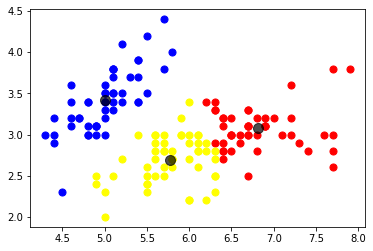

In [23]:
plt.scatter(X[y_kmeans == 0]['SepalLengthCm'], X[y_kmeans == 0]['SepalWidthCm'], s = 50, c = 'red', label = 'Iris Setosa')
plt.scatter(X[y_kmeans == 1]['SepalLengthCm'], X[y_kmeans == 1]['SepalWidthCm'], s = 50, c = 'blue', label = 'Iris Versicolor')
plt.scatter(X[y_kmeans == 2]['SepalLengthCm'], X[y_kmeans == 2]['SepalWidthCm'], s = 50, c = 'yellow', label = 'Iris Versicolor')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids',alpha=0.7)

plt.show()